# Brazilian Medical Appointments Dataset

## Caleb Pitts - 8/6/18

## Table of Contents
<ul>
<li><a href="#intro">Purpose</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Purpose

> In this analysis, I'm going to look at a dataset showing the turnout rate for over 100 thousand medical appointments in Brazil. I am going to focus on determining what factors influenced some patients to show up and others to not show up. I am also going to look at the types of medical complications and see which appear more often over others. And I want to see if certain geographical areas are more prone to certain medical complications.

In [1]:
# Importing the packages I will be using.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here, I'm extrapolating the dataset so I can answer my questions in the analysis section.

### General Properties

In [2]:
# Loading in the dataset and inspecting the structure.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Tells me the number of recorded appointments in the dataset.
df.shape

(110527, 14)

In [4]:
# Gives me an idea of the range of some of the characteristics.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Tells me the datatypes and which columns have NaN values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


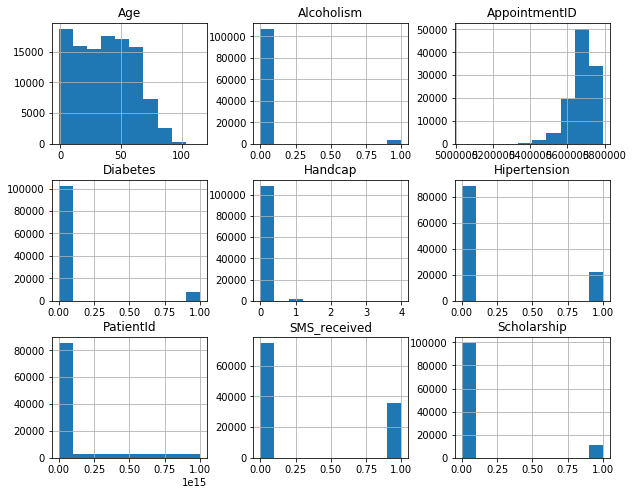

In [6]:
# This just gives a quick idea of what data I'm working with.
df.hist(figsize=(10, 8));

### Data Cleaning 

In [8]:
# There are no NaN values in this dataset.
# I am going to drop columns that won't help me answer my questions.
# The PatientId and Appointment Id don't really tell me anything about the patient, so I willmost likely drop those two columns.
# Before I do that, let me determine that all the patients in this datasets are unique.
print(df['PatientId'].duplicated().sum())
print(df['AppointmentID'].duplicated().sum())
df.nunique()

48228
0


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# There are actually many duplicated PatientID rows, so I need to keep that column in to group the same patients together.
# However, all the apointments are unique, so I am going to go ahead and drop that.
df.drop(['AppointmentID'], axis=1, inplace=True)

In [10]:
# I am going to lowercase and rename some of the columns for cleanliness.
df.columns = map(str.lower, df.columns)
df.rename(index=str, columns={'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'no-show':'no_show'}, inplace=True)
df.head(1)

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
# Changing the no_show column to 0 or 1 to be consistent with the other columns.
df['no_show'].replace('No', 0, inplace=True)
df['no_show'].replace('Yes', 1, inplace=True)

In [12]:
# Converting scheduled day and appointment days into datetime format.
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

<a id='eda'></a>
## Data Analysis

### Q1: What Common Characteristics Are Associated With Patients Who Miss Their Apointment?
> To answer the question, I am looking at a few metrics. The patients age, gender, hospital location, and whether they recieved an sms or not. I will look at any relationship between these variables and the mean turnout rate.

In [25]:
# The overall mean appointment turnout rate across all appointments made. 
# (1 means they never showed up, 0 means they arrived in the dataset)
overall_turnout_rate = 1 - df['no_show'].mean()
overall_turnout_rate

0.798067440534892

In [26]:
df.query('handcap > 1.0')

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [27]:
# I found that some Handicap values were not 0 or 1, so I am changing any value above 1 to 1, 
# since handicapedness is a categorical condition, not a numerical one.
df.loc[df.handcap > 1.0, 'handcap'] = 1.0

In [28]:
# All the handcaps over 1.0 now after the previous commmand. There are none.
df.query('handcap > 1.0')

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [29]:
# Seperating all the patients that were present/absent in their respective dataframes.
present = df.query('no_show == 0')
absent = df.query('no_show == 1')

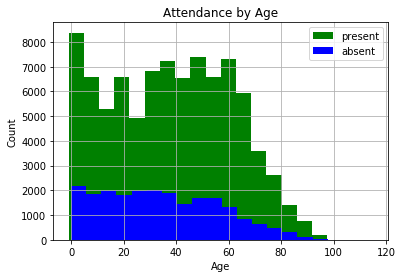

In [30]:
# A histogram detailing the number of absent and present patients based upon their age.
present.age.hist(color='green', bins=20, label='present')
absent.age.hist(color='blue', bins=20, label='absent')
plt.legend()
plt.title('Attendance by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show();

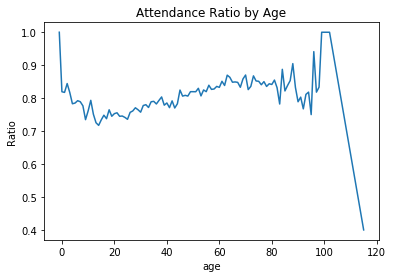

In [31]:
# Let's look at the ratio between age and attendance on a line chart.
age_group = 1 - df.groupby(['age'])['no_show'].mean()
age_group.plot(kind='line')
plt.title('Attendance Ratio by Age')
plt.ylabel('Ratio');

sms_received
0    0.832967
1    0.724255
Name: no_show, dtype: float64


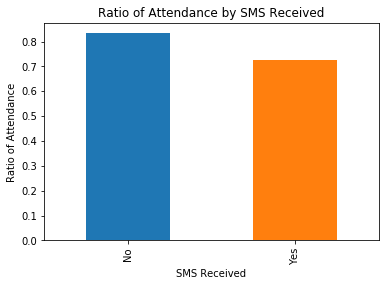

In [32]:
# Now lets look at whether the rate of attendance changed with an SMS message.
sms = 1 - df.groupby(['sms_received'])['no_show'].mean()
print(sms)
sms.plot(kind='bar')
plt.title('Ratio of Attendance by SMS Received')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('SMS Received')
plt.ylabel('Ratio of Attendance');

appointment_day
Thursday     0.806459
Wednesday    0.803108
Tuesday      0.799064
Monday       0.793529
Friday       0.787739
Saturday     0.769231
Name: no_show, dtype: float64


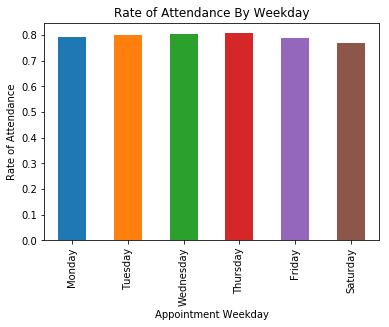

In [33]:
# Finally, I am looking at whether the day of the week was associated with attendance.
weekday = 1 - df.groupby(df['appointment_day'].dt.weekday_name)['no_show'].mean()
weekday.sort_values(ascending=False, inplace=True)
print(weekday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday.loc[day_order].plot(kind='bar')
plt.title("Rate of Attendance By Weekday")
plt.xlabel("Appointment Weekday")
plt.ylabel("Rate of Attendance");

### Q2: What Areas Treat The Most Patients of Each Medical Complication? 
### Q2b: How are Age and Each Medical Complication Associated?

In [34]:
# First, I am going to seperate the dataframe into smaller dataframes 
# of people who have an appointment for a certain conditions.
df.head(1)

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0.0,0,0


In [35]:
# The top 10 hospitals treating patients with ANY condition.
df_conditions = df.query('hipertension == 1.0' or 'diabetes == 1.0' or 'alcoholism == 1.0' or 'handcap_n == 1.0')
most_used = df_conditions.groupby(['neighbourhood'])['neighbourhood'].count().sort_values(ascending=False).head(10)
most_used_list = most_used.index.tolist()
most_used

neighbourhood
JARDIM DA PENHA    1002
RESISTÊNCIA         858
ITARARÉ             759
CENTRO              736
SANTA MARTHA        720
BONFIM              717
TABUAZEIRO          712
SÃO PEDRO           670
SANTO ANTÔNIO       642
CARATOÍRA           635
Name: neighbourhood, dtype: int64

In [36]:
# Here I am placing all the rows in 'dfm' that have a neighbourhood corresponding to the list I created in the above cell.
# Then I grouped all the neighbourhoods in 'dfmg' and calculated the sums/number of patients with each condition.
dfm = df[df['neighbourhood'].isin(most_used_list)]
dfmg = dfm.groupby(['neighbourhood']).sum()

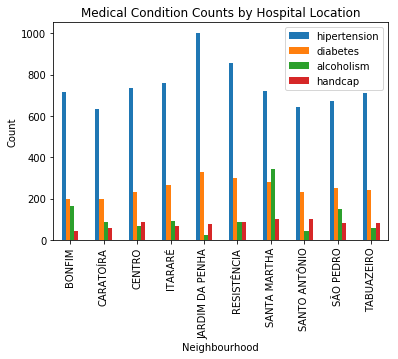

In [37]:
# A bar chart detailing the number of seen cases of each condition that the most utlized hospitals encounter.
dfmg.plot(kind='bar', y=['hipertension', 'diabetes', 'alcoholism', 'handcap'])
plt.title('Medical Condition Counts by Hospital Location')
plt.xlabel('Neighbourhood')
plt.ylabel('Count');


In [38]:
# For Q2b, I wanted to analyze how age and gender are associated with each medical condition. 
# I will group each age's count of each medical condition.
age_count = df.groupby(['age'])['patientid'].count()
age_cond = df.groupby(['age']).sum()
age_count.reset_index()
age_cond.reset_index().head(0)

,age,patientid,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [39]:
# I am dropping rows that will skew the visuals and have really small age sample sizes.
age_count = age_count.drop(labels=[-1, 100, 99, 102, 115], axis=0)
age_cond = age_cond.drop(labels=[-1, 100, 99, 102, 115], axis=0)

In [40]:
# I am calculating the ratio between the number of patients and the number of patients with each condition.
# This decreases the bias toward extreme cases with only a few number of patients being measured at a particular age.
age_cond['hipertension_ratio'] = age_cond['hipertension'] / age_count
age_cond['diabetes_ratio'] = age_cond['diabetes'] / age_count
age_cond['alcoholism_ratio'] = age_cond['alcoholism'] / age_count
age_cond['handcap_ratio'] = age_cond['handcap'] / age_count

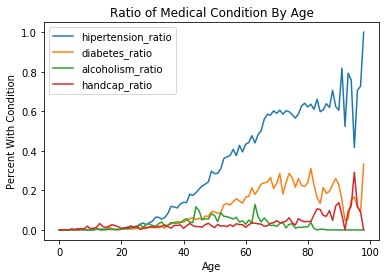

In [41]:
# Finally, I plot on a line graph the change in ratio over age on the same axis.
age_cond['hipertension_ratio'].plot(kind='line')
age_cond['diabetes_ratio'].plot(kind='line')
age_cond['alcoholism_ratio'].plot(kind='line')
age_cond['handcap_ratio'].plot(kind='line')
plt.legend()
plt.title('Ratio of Medical Condition By Age')
plt.xlabel('Age')
plt.ylabel('Percent With Condition');

<a id='conclusions'></a>
## Conclusions

From my first question, I found that approximately 79.8% of patients make their appointment. However in the "Attendance By Age" chart, we can see the larger difference between those who made their appointment and those who did not for younger ages 20-30 than older ages. In the line graph, we see the ratio between those who attended and the total population drop after age 10 until after age 20. Perhaps the patients whoh are really young have higher attendance rates because older caretakers are responsible for them. We see the older patients generally have a higher turnout rate but stagnates once they reach age 70 and beyond. 

Another characteristic I analyzed was the SMS messsaging system. These were reminders sent to patients about their appointment. In the "Ratio of attendance by SMS Recieved" bar chart, we can see that there was actually a higher ratio of people making their appointment if they did not recieve a text message. This surprised me, as I though their would be a higher proportion for those who got a reminder. I wanted to try and figure out why this result was different from what I expected, but the dataset limited me because there was no mention of whether a patient wrote the date down, or had their own remind system. Or perhaps they did not have a phone that they could be reminded. Economic status would have been a key characteristic that I would have looked at to tackle this surprising result.

Finally for my first question, I analyzed the ratio of attendace per weekday. I discovered that weekend appointments had lower turnout rates than weekday appointments. Friday and Saturday had the lowest turnot rate. This also suprised me becuase I thouogh people would have more time during those days. But perhaps the weekend is less regimented. Either way, weekdays had the higher turnout rate over weekends and Fridays.

For my second question, I wanted to see which medical conditions were most prevelant in area hospitals. From the "Medical Condition Counts by Hosptial Location" bar chart, we see the busiest hospitals treating the most patients with medical conditions. What I thought was fascinating was the large differences is alcoholism treatment rates. Areas like Bonfim and Santa Martha has much higher alcoholism treatment rates. This is benificial in identifying areas with the highest rates of alchoholism. We can also see that Hipertension and Diabetes are the two most common medical conditions being treated. 

Finally, I looked at the Ratio of each medical Conditon by Age. As expected, most of the medical conditions were more prevelant as age increased. The only condition that stagnated was alcoholism. It was most prevelant from ages 40-65, but then tapered off after 70.

Much of these findings surprised me but it's always really cool to see that almost all of these characteristics, recored in each column of data, have some relationship to be found and interpreted.
